In [22]:
from utilityFunctions import load_csv_to_matrix_batch, compute_color_preference_distance_batch, show_heatmaps, compute_color_similarity_distance_batch, compute_correlations
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [23]:
unique_colours = np.array(['#d2b700', '#db8b08', '#c7512c', '#c13547', '#a03663', '#753a7a', '#4b488e', '#005692', '#006a8b', '#007b75', '#008a52', '#9aa400'])
colour_index = {colour: idx for idx, colour in enumerate(unique_colours)}
matrix_size = len(unique_colours)

In [24]:
unique_colours = np.array(['#d2b700', '#db8b08', '#c7512c', '#c13547', '#a03663', '#753a7a', '#4b488e', '#005692', '#006a8b', '#007b75', '#008a52', '#9aa400'])
colour_index = {colour: idx for idx, colour in enumerate(unique_colours)}
matrix_size = len(unique_colours)

response_type = 'preference'

folder_path = 'raw_data/202411_data_without19/Group1'
subject_matrices_preference_group1 = load_csv_to_matrix_batch(folder_path, response_type, colour_index, matrix_size)
subject_matrices_preference_distance_group1 = compute_color_preference_distance_batch(subject_matrices_preference_group1)
average_subject_matrices_preference_distance_group1 = sum(subject_matrices_preference_distance_group1) / len(subject_matrices_preference_distance_group1)

folder_path = 'raw_data/202411_data_without19/Group2'
subject_matrices_preference_group2 = load_csv_to_matrix_batch(folder_path, response_type, colour_index, matrix_size)
subject_matrices_preference_distance_group2 = compute_color_preference_distance_batch(subject_matrices_preference_group2)
average_subject_matrices_preference_distance_group2 = sum(subject_matrices_preference_distance_group2) / len(subject_matrices_preference_distance_group2)

response_type = 'similarity'

folder_path = 'raw_data/202411_data_without19/Group1'
subject_matrices_similarity_group1 = load_csv_to_matrix_batch(folder_path, response_type, colour_index, matrix_size)
subject_matrices_similarity_distance_group1 = compute_color_similarity_distance_batch(subject_matrices_similarity_group1)
average_subject_matrices_similarity_distance_group1 = sum(subject_matrices_similarity_distance_group1) / len (subject_matrices_similarity_distance_group1)

folder_path = 'raw_data/202411_data_without19/Group2'
subject_matrices_similarity_group2 = load_csv_to_matrix_batch(folder_path, response_type, colour_index, matrix_size)
subject_matrices_similarity_distance_group2 = compute_color_similarity_distance_batch(subject_matrices_similarity_group2)
average_subject_matrices_similarity_distance_group2 = sum(subject_matrices_similarity_distance_group2) / len(subject_matrices_similarity_distance_group2)

matrices = {
    "Preference Group 1": average_subject_matrices_preference_distance_group1,
    "Preference Group 2": average_subject_matrices_preference_distance_group2,
    "Similarity Group 1": average_subject_matrices_similarity_distance_group1,
    "Similarity Group 2": average_subject_matrices_similarity_distance_group2,
}


In [25]:
preference_matrices = {
    "Preference Group 1": average_subject_matrices_preference_distance_group1,
    "Preference Group 2": average_subject_matrices_preference_distance_group2
}
similarity_matrices = {
    "Similarity Group 1": average_subject_matrices_similarity_distance_group1,
    "Similarity Group 2": average_subject_matrices_similarity_distance_group2,
}

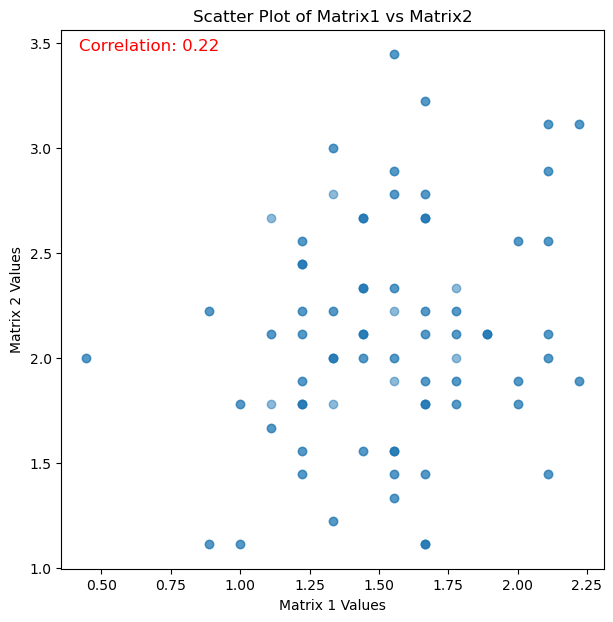

In [26]:
def scatter_matrices(matrix1, matrix2):
    if matrix1.shape != matrix2.shape:
        raise ValueError("Both matrices must have the same dimensions.")

    x = matrix1.flatten()
    y = matrix2.flatten()

    plt.figure(figsize=(7, 7))
    plt.scatter(x, y, alpha=0.5)
    plt.xlabel("Matrix 1 Values")
    plt.ylabel("Matrix 2 Values")
    plt.title("Scatter Plot of Matrix1 vs Matrix2")
    
    # Compute correlation coefficient
    correlation = np.corrcoef(x, y)[0, 1]
    plt.figtext(0.15, 0.85, f"Correlation: {correlation:.2f}", fontsize=12, color="red")

    plt.show()

scatter_matrices(average_subject_matrices_preference_distance_group1, average_subject_matrices_preference_distance_group2)

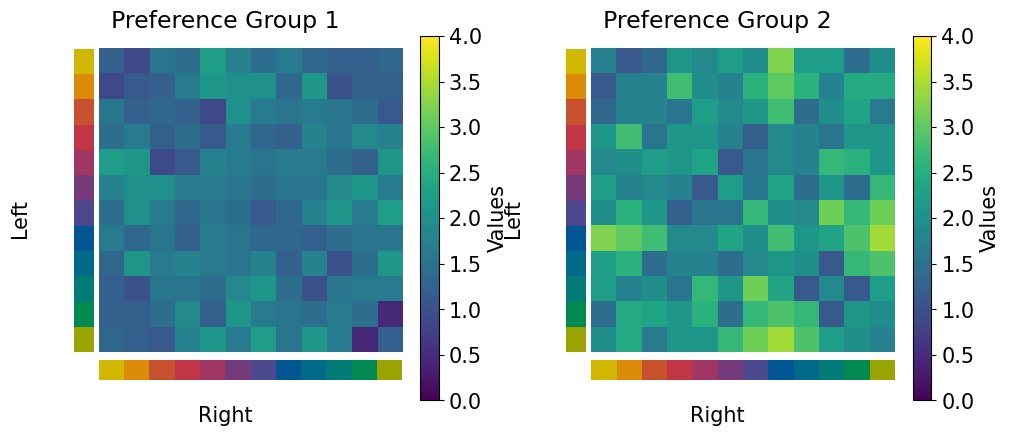

In [27]:
show_heatmaps(vmin_val=0, vmax_val=4, matrices=list(preference_matrices.values()), titles=list(preference_matrices.keys()), nrows=2, ncols=2, cbar_label="Values", color_labels=unique_colours)

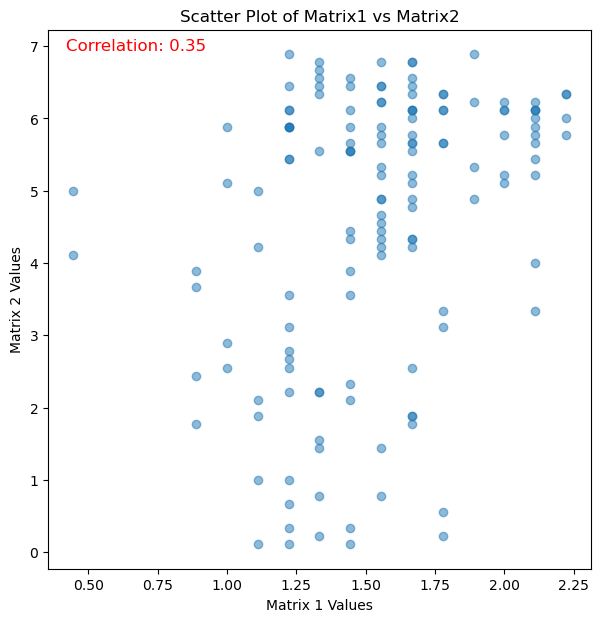

In [28]:
scatter_matrices(average_subject_matrices_preference_distance_group1, average_subject_matrices_similarity_distance_group1)

In [ ]:
preference1_similarity1 = {
    "Preference Group 1": average_subject_matrices_preference_distance_group1,
    "Similarity Group 1": average_subject_matrices_similarity_distance_group1,
}

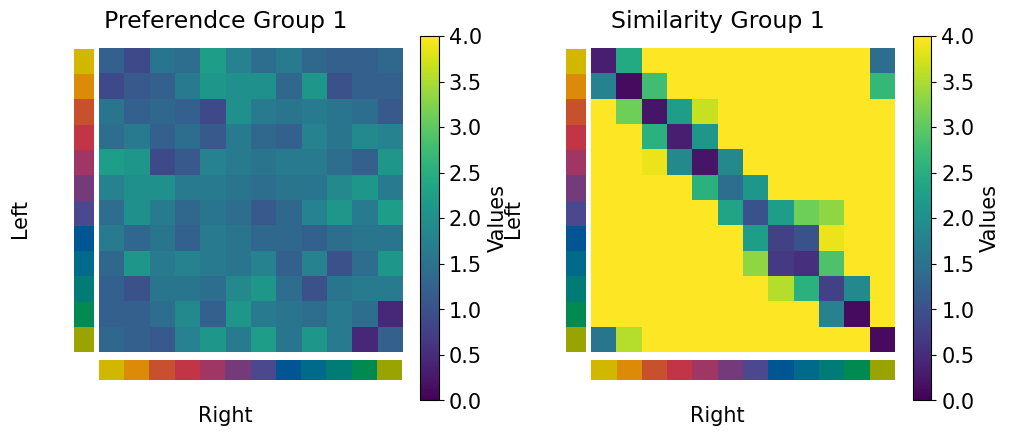

In [30]:
show_heatmaps(vmin_val=0, vmax_val=4, matrices=list(preference1_similarity1.values()), titles=list(preference1_similarity1.keys()), nrows=2, ncols=2, cbar_label="Values", color_labels=unique_colours)